In [31]:
import pandas as pd

prot_df = pd.read_csv('data/train_proteins.csv')
clin_df = pd.read_csv('data/train_clinical_data.csv')
clin_df = clin_df.rename(columns={'upd23b_clinical_state_on_medication': 'on_meds'})

clin_df['on_meds'] = clin_df['on_meds'].fillna(0)
clin_df['on_meds'] = clin_df['on_meds'].replace({'Off': 0, 'On': 1})


In [32]:
pivoted = prot_df.pivot(index="visit_id", columns="UniProt", values="NPX")

import numpy as np

# Normalize each column separately
for col in pivoted.columns:
    col_data = pivoted[col].dropna()
    mean = col_data.mean()
    std = col_data.std(ddof=1)
    pivoted[col] = (pivoted[col] - mean) / std
    
# Alternatively, you can replace NaN values with the mean of each column:
# normalized = pivoted.fillna(pivoted.mean())

# Replace original NaN values in pivoted with -1
norm_prot_df = pivoted.fillna(0)


In [33]:
norm_prot_df

UniProt     O00391    O00533    O00584    O14498    O14773    O14791   
visit_id                                                               
10053_0  -0.900600 -0.461720  0.000000  0.000000 -1.470450 -0.444028  \
10053_12 -0.417843 -0.320609  0.000000  0.000000  0.000000  0.000000   
10053_18  0.566004 -0.016030 -1.810210 -0.329170  0.000000 -0.553583   
10138_12  0.340410 -0.070349 -1.619825 -0.013312  0.672284  2.636155   
10138_24  0.128482  0.046548 -2.055741 -1.197716  1.594137 -0.297542   
...            ...       ...       ...       ...       ...       ...   
8699_24  -0.588663 -0.470336 -0.211620  0.000000 -0.103930  2.887669   
942_12   -1.733737 -0.637608 -0.760188 -1.485313  0.127695 -1.122628   
942_24    0.000000 -0.672121 -0.342884 -0.463266 -0.138815 -1.328256   
942_48   -0.004780 -1.100151 -0.416531 -0.111936  0.663088 -0.777090   
942_6    -0.150005 -0.473610 -0.553428  0.471806 -1.606781 -0.385779   

UniProt     O15240    O15394    O43505    O60888  ...    Q9HDC9    Q9NQ79   
visit_id                                          ...                       
10053_0  -0.593125 -1.667750 -0.354558 -0.281485  ...  0.000000 -1.391765  \
10053_12  0.975488 -1.668428 -0.392920 -0.642241  ...  0.000000 -1.127541   
10053_18  0.004869 -1.612750 -0.344776  0.316984  ...  0.273013  0.170261   
10138_12  0.414596  0.176453  0.105514 -1.527830  ...  2.069495  0.485349   
10138_24  0.343887  0.073175  0.568006 -1.027346  ...  0.000000  0.660812   
...            ...       ...       ...       ...  ...       ...       ...   
8699_24  -0.668856 -0.202889  0.735489 -0.111533  ...  0.000000 -0.523964   
942_12   -0.540278 -0.609492  0.207333 -0.773126  ... -1.757402 -0.105180   
942_24   -0.156427 -0.686454 -0.122440 -0.796141  ... -0.750672 -0.305691   
942_48   -0.603586 -0.964683 -0.350721 -1.042718  ... -0.619822 -0.331734   
942_6     0.472508 -0.343764 -0.377169 -1.035866  ... -0.205975 -0.430813   

UniProt     Q9NYU2    Q9UBR2    Q9UBX5    Q9UHG2    Q9UKV8    Q9UNU6   
visit_id                                                               
10053_0  -0.731008  0.000000 -0.987070 -0.509656 -0.155142 -0.665670  \
10053_12  0.000000  0.000000 -0.551562 -0.571055 -0.164081  0.000000   
10053_18 -0.032686  0.000000  0.189582  0.150555 -0.383094 -1.363066   
10138_12  1.809923 -0.127163  0.110313 -0.006194  1.412260  0.966993   
10138_24  2.720630  0.401529 -0.790307 -0.522044 -0.402934 -1.084349   
...            ...       ...       ...       ...       ...       ...   
8699_24   0.000000 -1.833403 -1.295444 -1.067865  1.693948 -0.813447   
942_12   -0.738786 -0.397118 -1.120484  0.041569  0.481254 -0.085353   
942_24   -0.660126 -0.850905 -0.938037  0.263195  0.270085 -0.087719   
942_48    0.405654  0.863510 -1.483325  0.023955  1.039986  0.210354   
942_6    -0.749259  0.486928 -1.122503  0.754062  0.478367  0.652694   

UniProt     Q9Y646    Q9Y6R7  
visit_id                      
10053_0   0.000000 -0.177409  
10053_12 -1.782304  0.445860  
10053_18  0.000000  0.763531  
10138_12  0.262118 -1.238675  
10138_24 -0.806772 -1.376184  
...            ...       ...  
8699_24   1.403941 -1.199522  
942_12   -0.350174 -0.806277  
942_24   -0.112542 -0.587157  
942_48   -0.975360 -0.419882  
942_6    -0.159065 -0.528789  

[1113 rows x 227 columns]

In [43]:
# Calculate mean and standard deviation of updrs_1 through updrs_4
updrs_mean = clin_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].mean()
updrs_std = clin_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].std()

# Normalize updrs_1 through updrs_4
clin_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']] = (clin_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']] - updrs_mean) / updrs_std
norm_clin_df = clin_df.fillna(0)



In [44]:
norm_clin_df

visit_id  patient_id  visit_month   updrs_1   updrs_2   updrs_3   
0         55_0          55            0  0.522985 -0.117642 -0.296163  \
1         55_3          55            3  0.522985  0.040566  0.373702   
2         55_6          55            6  0.160988  0.515189  0.976580   
3         55_9          55            9  0.160988  0.356981  0.708634   
4        55_12          55           12  0.522985  0.515189  1.445485   
...        ...         ...          ...       ...       ...       ...   
2610  65043_48       65043           48 -0.020011 -0.117642 -0.430136   
2611  65043_54       65043           54 -0.563007  0.198774 -0.564109   
2612  65043_60       65043           60 -0.201010 -0.117642 -0.229177   
2613  65043_72       65043           72 -0.744006  0.356981 -0.363149   
2614  65043_84       65043           84 -0.020011  0.356981  0.038769   

           updrs_4  on_meds  
0     2.449578e-17        0  
1     2.449578e-17        0  
2     2.449578e-17        0  
3    -7.933932e-01        1  
4    -7.933932e-01        1  
...            ...      ...  
2610 -7.933932e-01        0  
2611 -3.672416e-01        0  
2612 -3.672416e-01        0  
2613 -3.672416e-01        0  
2614  4.850615e-01        0  

[2615 rows x 8 columns]

In [28]:
class Measurement:
    def __init__(self, visit_id):
        self.id = visit_id
        self.patient, self.month = visit_id.split('_')

        self.proteins = []
        self.peptides = {}
        self.updrs1 = None
        self.updrs2 = None
        self.updrs3 = None
        self.updrs4 = None
        self.on_meds = None

    def add_protein_data(self, protein, NPX):
        self.peptides[protein] = NPX

class Patient:
    def __init__(self, id):
        self.id = id
        self.measurements = []

    def __repr__(self):
        return f"Patient(id={self.id})"
    
    def add_measurement(self, measurement):
        self.measurements.append(measurement)

    def __len__(self):
        return len(self.measurements)


In [29]:
patients = {}
# Instantiate a Patient object for each unique patient_id
for id in prot_df.patient_id.unique():
    patients[id] = Patient(id)

In [76]:
# Create a dictionary to store Measurement objects with visit_id as the key
measurements = {}

# Iterate through prot_df
for index, row in prot_df.iterrows():
    visit_id = row['visit_id']
    protein = row['UniProt']
    NPX = row['NPX']

    # If visit_id is not in the measurements dictionary, create a new Measurement object
    if visit_id not in measurements:
        measurements[visit_id] = Measurement(visit_id)

    # Add protein and NPX data to the corresponding Measurement object
    measurements[visit_id].add_protein_data(protein, NPX)

    # Get UPDRS scores and medication status for the visit_id from clin_df
    clin_data = clin_df.loc[clin_df['visit_id'] == visit_id]
    if len(clin_data) > 0:
        measurements[visit_id].updrs1 = clin_data['updrs_1'].values[0]
        measurements[visit_id].updrs2 = clin_data['updrs_2'].values[0]
        measurements[visit_id].updrs3 = clin_data['updrs_3'].values[0]
        measurements[visit_id].updrs4 = clin_data['updrs_4'].values[0]
        measurements[visit_id].on_meds = clin_data['upd23b_clinical_state_on_medication'].values[0]


In [77]:
# Iterate through the measurements dictionary
for visit_id, measurement in measurements.items():
    # Get the patient_id from the Measurement object
    patient_id = int(measurement.patient)

    # Add the Measurement object to the corresponding Patient object
    patients[patient_id].add_measurement(measurement)

# Print the measurements of the Patient with id 55
for measurement in patients[55].measurements:
    print(measurement.id)

55_0
55_6
55_12
55_36
55_0
55_6
55_12
55_36


In [78]:
for patient_id, patient in patients.items():
    num_measurements = len(patient)
    print(f"Patient {patient_id} with the {num_measurements} measurements")

Patient 55 with the 8 measurements
Patient 1517 with the 8 measurements
Patient 1923 with the 6 measurements
Patient 2660 with the 10 measurements
Patient 3636 with the 6 measurements
Patient 3863 with the 10 measurements
Patient 4161 with the 12 measurements
Patient 4172 with the 14 measurements
Patient 5027 with the 8 measurements
Patient 5178 with the 14 measurements
Patient 5645 with the 12 measurements
Patient 5742 with the 6 measurements
Patient 6054 with the 6 measurements
Patient 6211 with the 14 measurements
Patient 7051 with the 8 measurements
Patient 7117 with the 8 measurements
Patient 7568 with the 8 measurements
Patient 7832 with the 10 measurements
Patient 8699 with the 6 measurements
Patient 10053 with the 6 measurements
Patient 10174 with the 10 measurements
Patient 10541 with the 8 measurements
Patient 10715 with the 8 measurements
Patient 10718 with the 10 measurements
Patient 11459 with the 10 measurements
Patient 11686 with the 12 measurements
Patient 11928 with th

In [79]:
num_patients = len(patients)
num_measurements = len(measurements)
print(f"Number of Measurement objects: {num_measurements}")
print(f"Number of Patient objects: {num_patients}")


Number of Measurement objects: 1113
Number of Patient objects: 248


In [80]:
def plot_patient_measurements(patient):
    fig, ax = plt.subplots()
    ax.set_xlabel('Protein')
    ax.set_ylabel('NPX (log scale)')
    ax.set_title(f'Patient {patient.id} Measurements')

    for measurement in patient.measurements:
        ax.scatter(list(measurement.peptides.keys()), list(measurement.peptides.values()), label=measurement.id)

    ax.set_yscale('log')
    ax.legend()
    plt.show()

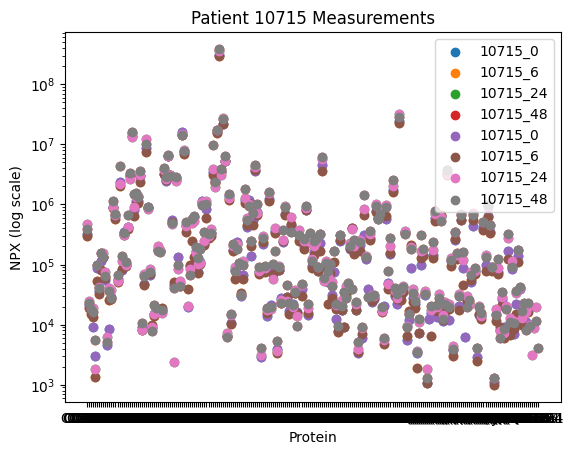

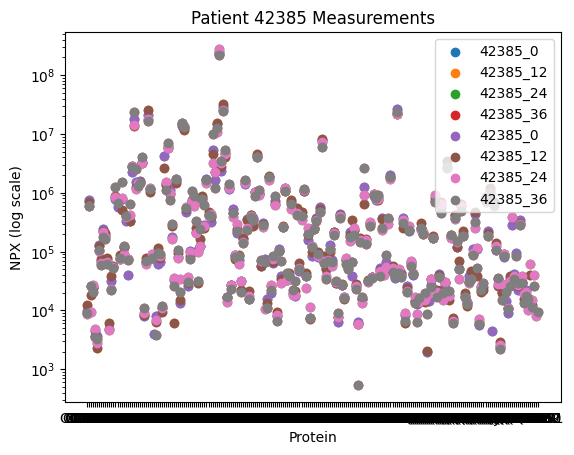

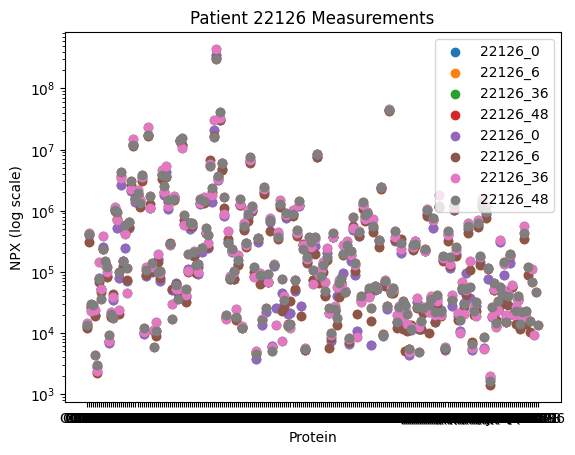

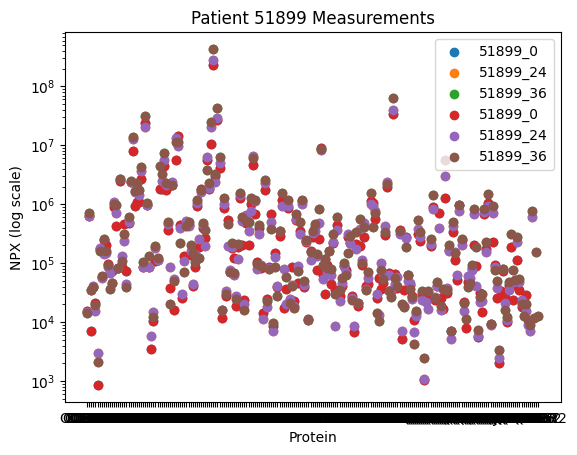

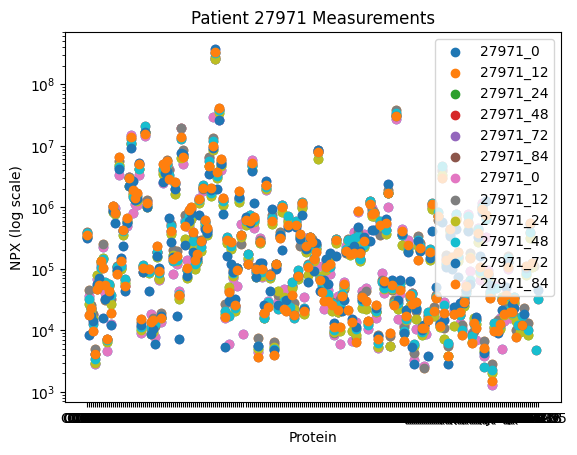

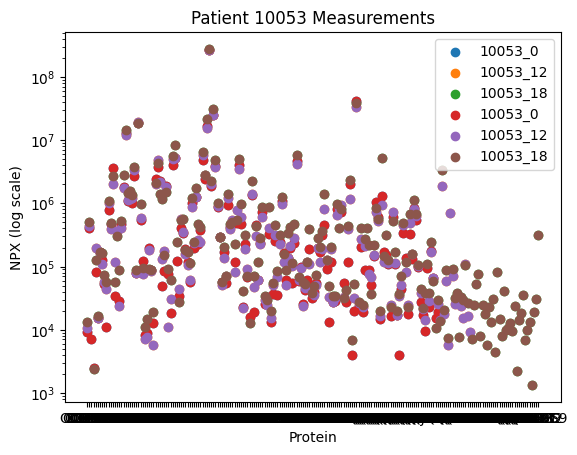

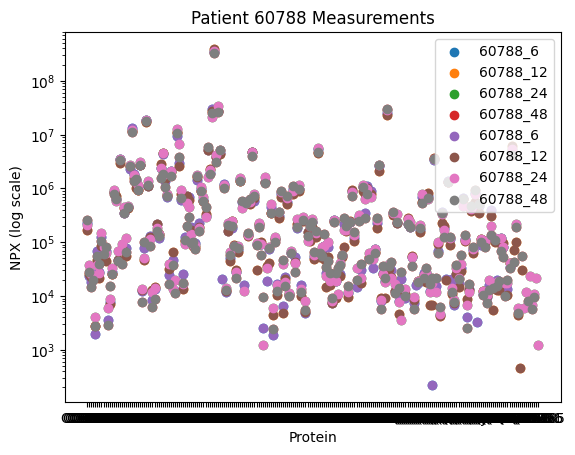

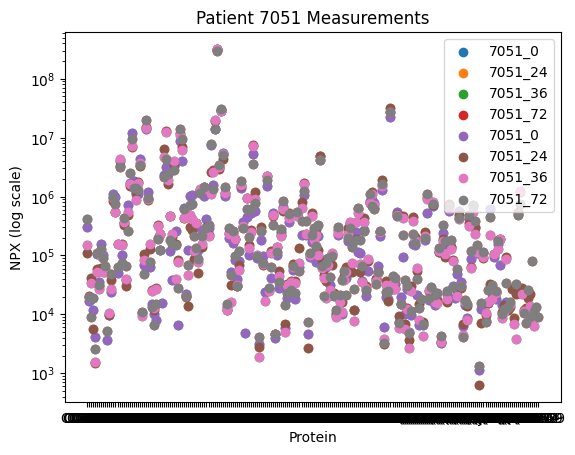

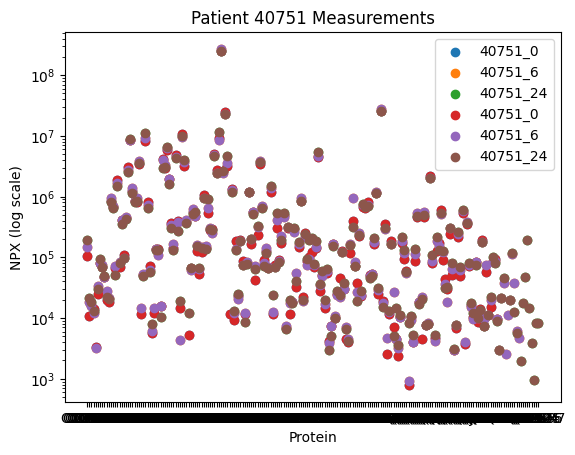

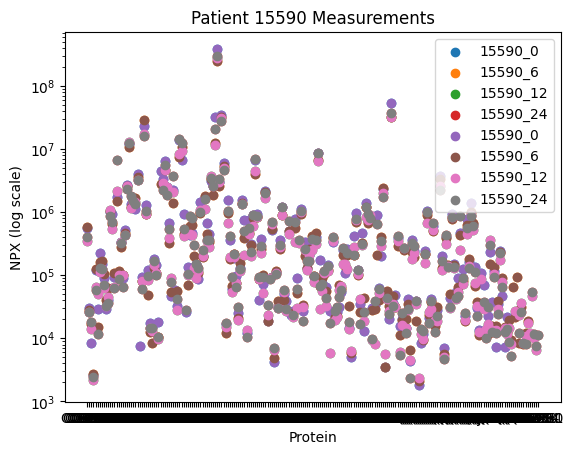

In [81]:
import random

# assuming patients is a dictionary or a set of Patient objects
# create a list of 10 randomly selected patients
random_patients = random.sample(list(patients.values()), 10)

# plot the measurements for each of the 10 random patients
for patient in random_patients:
    plot_patient_measurements(patient)


In [ ]:
import random

# assuming patients is a dictionary or a set of Patient objects
# create a list of 10 randomly selected patients
random_patients = random.sample(list(patients.values()), 10)

# plot the measurements for each of the 10 random patients
for patient in random_patients:
    plot_patient_measurements(patient)


In [1]:
## estimate UPDRS from Protein measurements


prot_df

NameError: name 'prot_df' is not defined